# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [128]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [129]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [130]:
url = "http://api.openweathermap.org/data/2.5/weather?"
i = 1
j = 1
setnum = 1
mtrcs = "metric"

resp=[]

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + mtrcs
    print(f"Processing Record {i} of set {setnum} | {city}")
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    i = i + 1
    if i == 50:
        setnum = setnum + 1
        i = 1

    if weather_json['cod'] == 404:
        print("City not found. Skipping...")
    elif weather_json['cod'] == 200:
        resp.append(weather_json)
        
    # remove the below code before final check in
    #j = j + 1
    #if j == 20:
    #    break

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | camalu
Processing Record 2 of set 1 | addis zemen
Processing Record 3 of set 1 | busselton
Processing Record 4 of set 1 | hobart
Processing Record 5 of set 1 | rikitea
Processing Record 6 of set 1 | ambilobe
Processing Record 7 of set 1 | najran
Processing Record 8 of set 1 | souillac
Processing Record 9 of set 1 | constitucion
Processing Record 10 of set 1 | barrow
Processing Record 11 of set 1 | port-gentil
Processing Record 12 of set 1 | tuatapere
Processing Record 13 of set 1 | dikson
Processing Record 14 of set 1 | butaritari
Processing Record 15 of set 1 | haines junction
Processing Record 16 of set 1 | broome
Processing Record 17 of set 1 | nikolskoye
Processing Record 18 of set 1 | tombouctou
Processing Record 19 of set 1 | kuche
Processing Record 20 of set 1 | north bend
Processing Record 21 of set 1 | gigmoto
Processing Record 22 of set 1 | payson
Processing Record 23 of set 1 | port alfred


Processing Record 3 of set 5 | svetlogorsk
Processing Record 4 of set 5 | kahului
Processing Record 5 of set 5 | poso
Processing Record 6 of set 5 | baruun-urt
Processing Record 7 of set 5 | guerrero negro
Processing Record 8 of set 5 | lompoc
Processing Record 9 of set 5 | madang
Processing Record 10 of set 5 | taoudenni
Processing Record 11 of set 5 | kruisfontein
Processing Record 12 of set 5 | volokolamsk
Processing Record 13 of set 5 | nantucket
Processing Record 14 of set 5 | maues
Processing Record 15 of set 5 | severo-kurilsk
Processing Record 16 of set 5 | bambanglipuro
Processing Record 17 of set 5 | airai
Processing Record 18 of set 5 | eatonton
Processing Record 19 of set 5 | hvolsvollur
Processing Record 20 of set 5 | ribeira grande
Processing Record 21 of set 5 | kumluca
Processing Record 22 of set 5 | alta floresta
Processing Record 23 of set 5 | hailar
Processing Record 24 of set 5 | zemio
Processing Record 25 of set 5 | port-cartier
Processing Record 26 of set 5 | mayo

Processing Record 7 of set 9 | padang
Processing Record 8 of set 9 | miyako
Processing Record 9 of set 9 | den helder
Processing Record 10 of set 9 | sawtell
Processing Record 11 of set 9 | charters towers
Processing Record 12 of set 9 | rocha
Processing Record 13 of set 9 | mopti
Processing Record 14 of set 9 | huilong
Processing Record 15 of set 9 | doka
Processing Record 16 of set 9 | mastic beach
Processing Record 17 of set 9 | mwene-ditu
Processing Record 18 of set 9 | kimbe
Processing Record 19 of set 9 | elko
Processing Record 20 of set 9 | grindavik
Processing Record 21 of set 9 | yenagoa
Processing Record 22 of set 9 | puerto maldonado
Processing Record 23 of set 9 | huarmey
Processing Record 24 of set 9 | hami
Processing Record 25 of set 9 | ahipara
Processing Record 26 of set 9 | leshukonskoye
Processing Record 27 of set 9 | touros
Processing Record 28 of set 9 | kutum
Processing Record 29 of set 9 | harper
Processing Record 30 of set 9 | rungata
Processing Record 31 of set 

Processing Record 8 of set 13 | muisne
Processing Record 9 of set 13 | fairbanks
Processing Record 10 of set 13 | puerto cortes
Processing Record 11 of set 13 | groningen
Processing Record 12 of set 13 | aborlan
Processing Record 13 of set 13 | pontianak
Processing Record 14 of set 13 | manosque
Processing Record 15 of set 13 | khandyga
Processing Record 16 of set 13 | panguipulli
Processing Record 17 of set 13 | bismarck
Processing Record 18 of set 13 | tadepallegudem
Processing Record 19 of set 13 | tual
Processing Record 20 of set 13 | nadym
Processing Record 21 of set 13 | belovo


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [131]:
city = []
lat = []
lng = []
maxt = []
humid = []
cloud = []
wind = []
cnt = []
dt = []

for wresponse in resp:
        city.append(wresponse['name'])
        lat.append(wresponse['coord']['lat'])
        lng.append(wresponse['coord']['lon'])
        maxt.append(wresponse['main']['temp_max'])
        humid.append(wresponse['main']['humidity'])
        cloud.append(wresponse['clouds']['all'])
        wind.append(wresponse['wind']['speed'])
        cnt.append(wresponse['sys']['country'])
        dt.append(wresponse['dt'])
        
weather_dict = {
    "City": city,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxt,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": cnt,
    "Date": dt,
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Camalú,30.8500,-116.0667,13.33,56,21,4.92,MX,1614826703
1,Busselton,-33.6500,115.3333,25.36,67,44,4.14,AU,1614826616
2,Hobart,-42.8794,147.3294,22.00,24,20,11.32,AU,1614826473
3,Rikitea,-23.1203,-134.9692,27.02,78,74,3.15,PF,1614826612
4,Ambilobe,-13.2000,49.0500,23.21,94,42,0.53,MG,1614826703
5,Najrān,17.4924,44.1277,17.00,29,0,2.06,SA,1614826704
6,Souillac,-20.5167,57.5167,24.00,88,75,3.60,MU,1614826409
7,Constitución,-35.3333,-72.4167,17.59,67,0,3.85,CL,1614826704
8,Barrow,71.2906,-156.7887,-28.00,69,40,3.09,US,1614826429
9,Port-Gentil,-0.7193,8.7815,27.62,83,100,6.58,GA,1614826704


In [132]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,18.820496,20.266574,12.310542,72.256318,52.749097,3.591264,1.614827e+09
std,32.630422,90.948529,15.992814,20.319581,39.338245,2.673685,1.042109e+02
min,-54.800000,-179.166700,-38.010000,10.000000,0.000000,0.110000,1.614826e+09
25%,-8.064750,-59.413775,3.602500,62.000000,7.000000,1.542500,1.614827e+09
50%,21.355000,24.057850,17.220000,76.000000,61.000000,3.090000,1.614827e+09
75%,45.021400,103.412525,25.000000,88.000000,90.750000,5.007500,1.614827e+09
max,78.218600,179.316700,36.000000,100.000000,100.000000,20.660000,1.614827e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [133]:
weather_data.drop(weather_data[weather_data['Humidity'] > 100].index, inplace = True)
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,18.820496,20.266574,12.310542,72.256318,52.749097,3.591264,1.614827e+09
std,32.630422,90.948529,15.992814,20.319581,39.338245,2.673685,1.042109e+02
min,-54.800000,-179.166700,-38.010000,10.000000,0.000000,0.110000,1.614826e+09
25%,-8.064750,-59.413775,3.602500,62.000000,7.000000,1.542500,1.614827e+09
50%,21.355000,24.057850,17.220000,76.000000,61.000000,3.090000,1.614827e+09
75%,45.021400,103.412525,25.000000,88.000000,90.750000,5.007500,1.614827e+09
max,78.218600,179.316700,36.000000,100.000000,100.000000,20.660000,1.614827e+09


In [134]:
#  Get the indices of cities that have humidity over 100%.
hWeather_df = weather_data[weather_data['Humidity'] > 100]
hWeather_df.index

Int64Index([], dtype='int64')

In [135]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(hWeather_df.index, inplace = False) 
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Camalú,30.8500,-116.0667,13.33,56,21,4.92,MX,1614826703
1,Busselton,-33.6500,115.3333,25.36,67,44,4.14,AU,1614826616
2,Hobart,-42.8794,147.3294,22.00,24,20,11.32,AU,1614826473
3,Rikitea,-23.1203,-134.9692,27.02,78,74,3.15,PF,1614826612
4,Ambilobe,-13.2000,49.0500,23.21,94,42,0.53,MG,1614826703


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

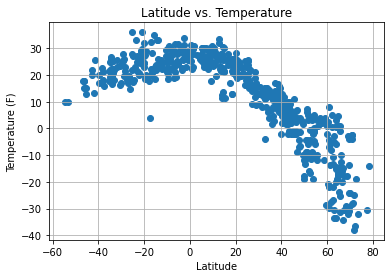

In [136]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

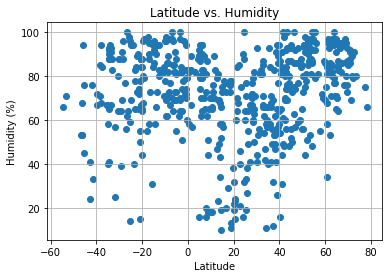

In [137]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

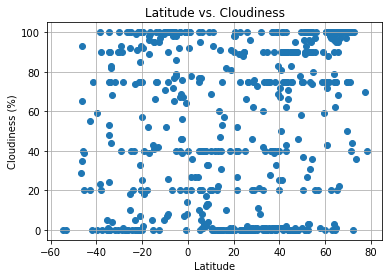

In [138]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

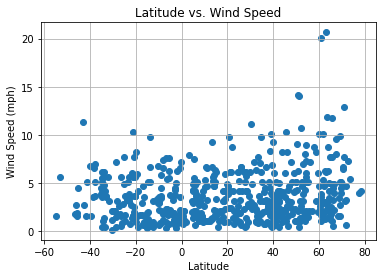

In [139]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Images/WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [140]:
north_df = weather_data[weather_data['Lat'] > 0]
north_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Camalú,30.8500,-116.0667,13.33,56,21,4.92,MX,1614826703
5,Najrān,17.4924,44.1277,17.00,29,0,2.06,SA,1614826704
8,Barrow,71.2906,-156.7887,-28.00,69,40,3.09,US,1614826429
11,Dikson,73.5069,80.5464,-32.10,80,36,5.44,RU,1614826705
12,Butaritari,3.0707,172.7902,27.49,82,27,7.92,KI,1614826617
13,Haines Junction,60.7522,-137.5108,-7.00,58,100,3.09,CA,1614826705
14,Broome,42.2506,-75.8330,2.00,69,90,4.12,US,1614826705
15,Nikolskoye,59.7035,30.7861,-2.00,86,0,6.00,RU,1614826352
16,Tombouctou,20.0000,-3.0000,21.57,19,98,4.91,ML,1614826454
17,North Bend,43.4065,-124.2243,8.33,76,90,1.54,US,1614826706


In [141]:
south_df = weather_data[weather_data['Lat'] < 0]
south_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Busselton,-33.6500,115.3333,25.36,67,44,4.14,AU,1614826616
2,Hobart,-42.8794,147.3294,22.00,24,20,11.32,AU,1614826473
3,Rikitea,-23.1203,-134.9692,27.02,78,74,3.15,PF,1614826612
4,Ambilobe,-13.2000,49.0500,23.21,94,42,0.53,MG,1614826703
6,Souillac,-20.5167,57.5167,24.00,88,75,3.60,MU,1614826409
7,Constitución,-35.3333,-72.4167,17.59,67,0,3.85,CL,1614826704
9,Port-Gentil,-0.7193,8.7815,27.62,83,100,6.58,GA,1614826704
10,Tuatapere,-46.1333,167.6833,17.78,53,93,1.79,NZ,1614826472
20,Port Alfred,-33.5906,26.8910,20.56,93,82,0.45,ZA,1614826365
22,Carnarvon,-24.8667,113.6333,27.00,69,40,3.60,AU,1614826706


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8120270828476553


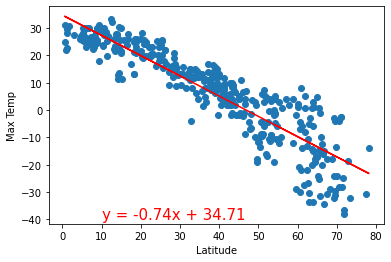

In [142]:
# Print out the r-squared value along with the plot.
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("Images/MaxTempInNorthernHemisphere.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.31250670645772777


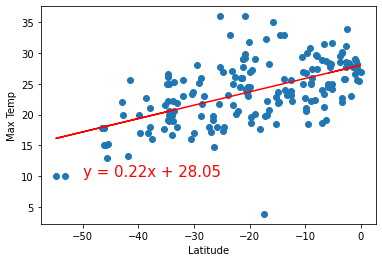

In [143]:
# Print out the r-squared value along with the plot.
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("Images/MaxTempInSouthernHemisphere.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1295889823710595


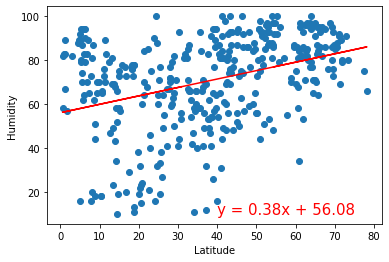

In [144]:
# Print out the r-squared value along with the plot.
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("Images/HumidityInNorthernHemisphere.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04501369035506846


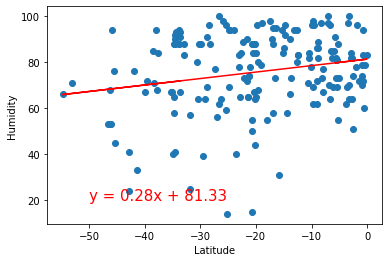

In [145]:
# Print out the r-squared value along with the plot.
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("Images/HumidityInSouthernHemisphere.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14660235190773266


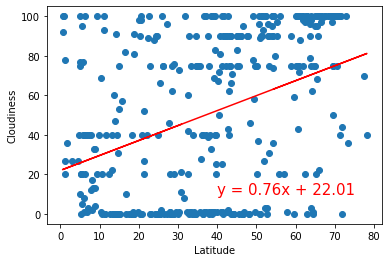

In [146]:
# Print out the r-squared value along with the plot.
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("Images/CloudinessInNorthernHemisphere.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08252226538047051


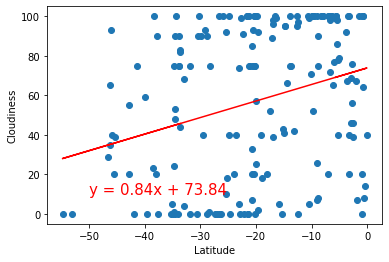

In [147]:
# Print out the r-squared value along with the plot.
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("Images/CloudinessInSouthernHemisphere.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.043660265676410015


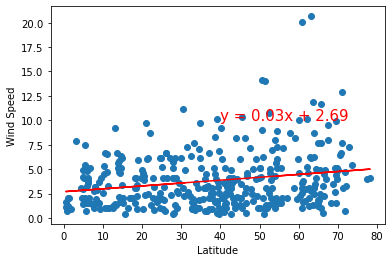

In [148]:
# Print out the r-squared value along with the plot.
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("Images/WindSpeedInNorthernHemisphere.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013261008538654345


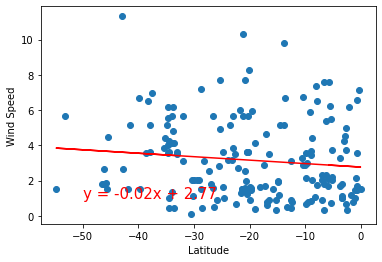

In [149]:
# Print out the r-squared value along with the plot.
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,1),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("Images/WindSpeedInSouthernHemisphere.png")

plt.show()

In [150]:
weather_data.to_csv(output_data_file,index=False)